<a href="https://colab.research.google.com/github/2303A52046/STAT_2303A52046/blob/main/2303A52046(SML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
d = pd.read_csv('/content/breast_cancer_survival.csv')
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [3]:
y = d['Patient_Status']
x = d.drop(['Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status'], axis=1)
print("Target: ", y)
print("Features: ", x)

Target:  0      Alive
1       Dead
2      Alive
3      Alive
4      Alive
       ...  
329    Alive
330    Alive
331     Dead
332    Alive
333     Dead
Name: Patient_Status, Length: 334, dtype: object
Features:       Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820  

In [4]:
x = x.replace({'Gender': {'MALE': 0, 'FEMALE': 1}})
x = x.replace({'Tumour_Stage': {'I': 1, 'II': 2, 'III': 3}})
x = x.replace({'Histology': {'Infiltrating Ductal Carcinoma': 1, 'Infiltrating Lobular Carcinoma': 2, 'Mucinous Carcinoma': 3}})
x = x.replace({'Surgery_type': {'Other': 1, 'Lumpectomy': 2, 'Modified Radical Mastectomy': 3, 'Simple Mastectomy': 4}})
x = x.replace({'ER status': {'Positive': 1, 'Negative': 0}})
x = x.replace({'PR status': {'Positive': 1, 'Negative': 0}})
x = x.replace({'HER2 status': {'Positive': 1, 'Negative': 0}})
y = y.replace({'Alive': 0, 'Dead': 1})
print(x)
print(y)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       1  0.952560   2.15000  0.007972 -0.048340             2   
1     54       1  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       1 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       1 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       1  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       1  0.024598   1.40050  0.024751  0.280320             2   
330   41       1  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       1  0.753820   1.64250 -0.332850  0.857860             2   
332   74       1  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       1  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  
0            1          1          1         

<ipython-input-4-9d2a80879e4d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace({'Gender': {'MALE': 0, 'FEMALE': 1}})
<ipython-input-4-9d2a80879e4d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace({'Tumour_Stage': {'I': 1, 'II': 2, 'III': 3}})
<ipython-input-4-9d2a80879e4d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set

In [5]:
x = (x - x.min()) / (x.max() - x.min())
y.fillna(0, inplace=True)
x.fillna(0, inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

SVM Accuracy: 0.8208955223880597
KNN Accuracy: 0.8208955223880597
Logistic Regression Accuracy: 0.8208955223880597


In [7]:
def bootstrap_accuracy(model, X, y, n_iterations=1000):
    accuracies = []
    for _ in range(n_iterations):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]
        model.fit(X_sample, y_sample)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)
    return accuracies

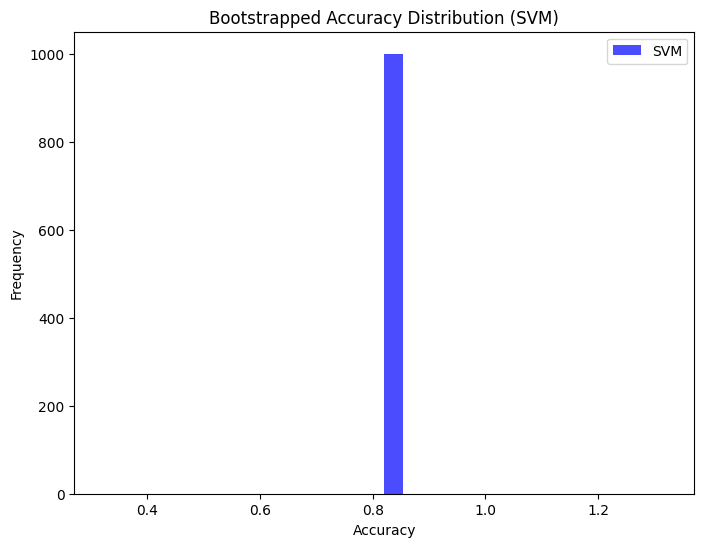

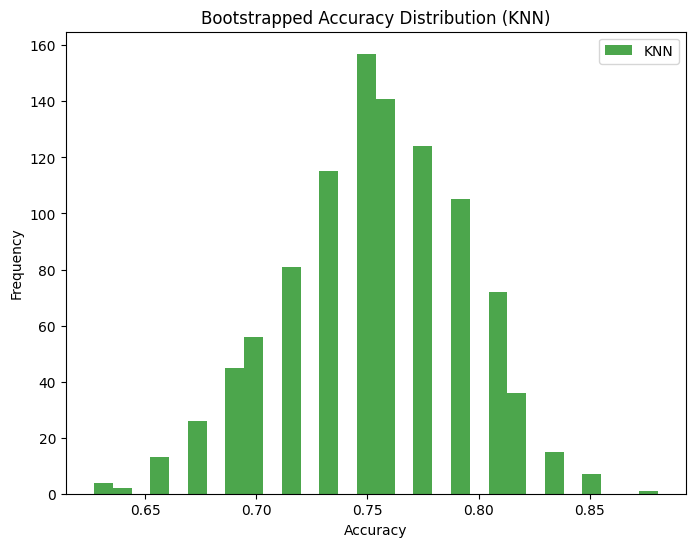

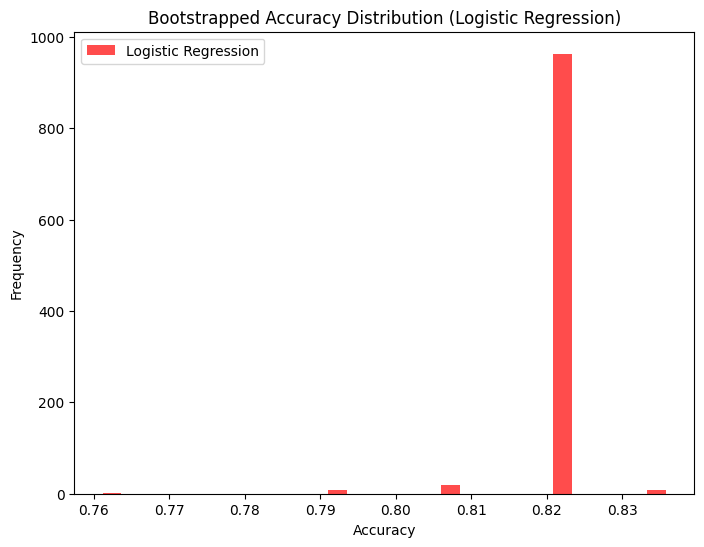

In [9]:
# Bootstrap for SVM
svm_bootstrap_accuracies = bootstrap_accuracy(SVC(), X_train, y_train)
plt.figure(figsize=(8, 6))
plt.hist(svm_bootstrap_accuracies, bins=30, alpha=0.7, color='blue', label='SVM')
plt.title('Bootstrapped Accuracy Distribution (SVM)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Bootstrap for KNN
knn_bootstrap_accuracies = bootstrap_accuracy(KNeighborsClassifier(), X_train, y_train)
plt.figure(figsize=(8, 6))
plt.hist(knn_bootstrap_accuracies, bins=30, alpha=0.7, color='green', label='KNN')
plt.title('Bootstrapped Accuracy Distribution (KNN)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Bootstrap for Logistic Regression
lr_bootstrap_accuracies = bootstrap_accuracy(LogisticRegression(), X_train, y_train)
plt.figure(figsize=(8, 6))
plt.hist(lr_bootstrap_accuracies, bins=30, alpha=0.7, color='red', label='Logistic Regression')
plt.title('Bootstrapped Accuracy Distribution (Logistic Regression)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()